# Linear Regression & Conditional Normal (General Case) 



## 1. Simulation ( Normal ) & Scatterplot Matrix

(Simulation) Simulate $N=100$ observations from the following 3-dimensional Normal distribution:
   $$ \left[ \begin{array}{c} Y \\ X_1 \\ X_2 \end{array} \right] \sim \mathcal{N} \left( \left[ \begin{array}{c} 3 \\ 2 \\ 1 \end{array} \right]  , 
   \left[ \begin{array}{ccc} 5 & 3 & 2\\ 3 & 4 & 1 \\ 2 & 1 & 3 \end{array} \right] 
   \right) $$
  Use `numpy.random.multivariate_normal()` after setting the seed wo 0 with `numpy.random.seed(0)` (for reproducibility). Create a `pandas.DataFrame()` with the data you generated, and plot a scatterplot matrix of the variables with `pd.plotting.scatter_matrix()`.

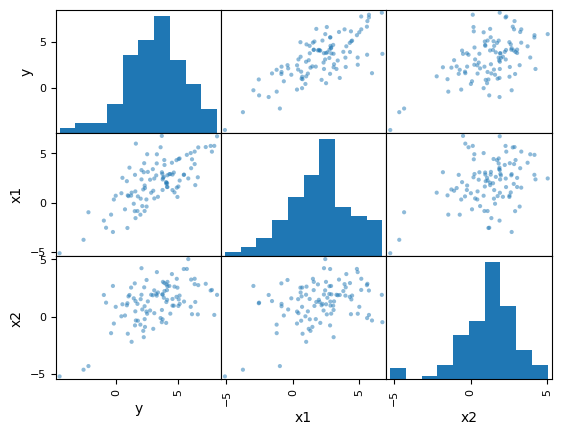

In [1]:
import numpy as np; np.random.seed(2)
# Define the mean vector and covariance matrix
mean = np.array([3, 2, 1])
cov = np.array([[5, 3, 2], 
                [3, 4, 1], 
                [2, 1, 3]])

N = 100 # number of observations
data_sim = np.random.multivariate_normal(mean, cov, N)

import pandas as pd
data_sim_df = pd.DataFrame( data_sim, columns = [ "y", "x1", "x2"] )
pd.plotting.scatter_matrix( data_sim_df);

## 2. Linear Regression & MSE
Use the data generated in the previous part to fit a linear regression of $Y$ on $X_1,X_2$ (*with intercept*), and report the resulting coefficients and residual mean squared error (MSE). note: root mean squared error is RMSE 

In [2]:
# Split data into response (y) and predictor (X) variables
Y = data_sim[:,0] ## Y = np.array( data_sim_df[["y"]] )    
X = data_sim[:,1:3] ## X = np.array( data_sim_df[["x1", "x2"]] )

# Fit linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients and residual standard error
print("Intercept:", model.intercept_ )
print("Coefficients:", model.coef_ )
print("Residual MSE:", np.var(Y - model.predict(X)) )

Intercept: 1.4326719116549633
Coefficients: [0.62394903 0.40144806]
Residual MSE: 2.0530609968725764


## 3. Conditional Normal


Compare the values you got from the previous part to the conditional mean and the conditional standard deviation of the (conditional) distribution of $Y$ given $X_1,X_2$.

$$\begin{bmatrix}Y\\X\end{bmatrix}\sim N(\begin{bmatrix}\mu_Y\\\mu_X\end{bmatrix},\begin{bmatrix}\Sigma_{YY}&\Sigma_{YX}\\\Sigma_{XY}&\Sigma_{YY}\end{bmatrix})$$
$$Y|X=x\sim N(\mu_{Y|X},\Sigma_{Y|X})$$where
$$\mu_{Y|X}=\mu_Y+\Sigma_{YX}\Sigma_{XX}^{-1}(x-\mu_X)=\Sigma_{YX}\Sigma_{XX}^{-1}x+(\mu_Y-\Sigma_{YX}\Sigma_{XX}^{-1}\mu_X)$$
$$\Sigma_{Y|X}=\Sigma_{YY}-\Sigma_{YX}^{-1}\Sigma_{XX}\Sigma_{XY}$$
conditional coefficient: $\Sigma_{YX}\Sigma_{XX}^{-1}$

conditional intercept: $\mu_Y-\Sigma_{YX}\Sigma_{XX}^{-1}\mu_X$

In [3]:
# Create partitioned mean and covariance vectors
meanY = mean[0]; meanX = mean[1:3]
covY = cov[0,0]; covX = cov[1:3,1:3]
covXY = cov[1:3,0]; covYX = cov[0,1:3]

# Calculate parameters of interest
cond_coef = covYX @ np.linalg.inv( covX )
cond_intcpt = meanY - cond_coef @ meanX
cond_var = covY - cond_coef @ covXY 

cond_std = cond_var**0.5

print("Conditional Intercept:", cond_intcpt  )
print("Conditional Coefficients:", cond_coef )
print("Conditional Residual MSE:", cond_var )
print("Conditional Residual RMSE:", cond_std )
# the fitted and theoretical parameters are very close

Conditional Intercept: 1.272727272727273
Conditional Coefficients: [0.63636364 0.45454545]
Conditional Residual MSE: 2.181818181818182
Conditional Residual RMSE: 1.4770978917519928


# 4. Conditional Normal (General Case)
## Mean & Variance/MSE, Intercept & Coefficients 

Conditional mean and the conditional standard deviation of the (conditional) distribution of $Y_1,..,Y_m$ given $X_1,...,X_n$.

$$\begin{bmatrix}Y\\X\end{bmatrix}\sim N(\begin{bmatrix}\mu_Y\\\mu_X\end{bmatrix},\begin{bmatrix}\Sigma_{YY}&\Sigma_{YX}\\\Sigma_{XY}&\Sigma_{YY}\end{bmatrix})$$
$$Y|X=x\sim N(\mu_{Y|X},\Sigma_{Y|X})$$where
$$\mu_{Y|X}=\mu_Y+\Sigma_{YX}\Sigma_{XX}^{-1}(x-\mu_X)=\Sigma_{YX}\Sigma_{XX}^{-1}x+(\mu_Y-\Sigma_{YX}\Sigma_{XX}^{-1}\mu_X)$$
$$\Sigma_{Y|X}=\Sigma_{YY}-\Sigma_{YX}^{-1}\Sigma_{XX}\Sigma_{XY}$$
conditional coefficient: $\Sigma_{YX}\Sigma_{XX}^{-1}$

conditional intercept: $\mu_Y-\Sigma_{YX}\Sigma_{XX}^{-1}\mu_X$

In [4]:
## output y is >=1 dimentional
import numpy as np;

def cond_coef(Sigma_YX,Sigma_XX):
    return Sigma_YX @ np.linalg.inv(Sigma_XX)

def cond_intcpt(Sigma_YX,Sigma_XX,mu_Y,mu_X):
    cond_coef=Sigma_YX @ np.linalg.inv(Sigma_XX)
    return mu_Y-cond_coef @ mu_X

def cond_var(Sigma_YX,Sigma_XX,Sigma_YY):
    return Sigma_YY-Sigma_YX @ np.linalg.inv(Sigma_XX)@ Sigma_YX.T

def mu_Y_given_X_at_x(Sigma_YX,Sigma_XX,mu_Y,mu_X,x):
    cond_coef=Sigma_YX @ np.linalg.inv(Sigma_XX)
    cond_intcpt=mu_Y-cond_coef @ mu_X
    return cond_coef @ x + cond_intcpt

## 
def get_mean_cov(mu,Sigma,dim_Y):
    mu.reshape(-1,1)
    mu_Y=mu[:dim_Y]
    mu_X=mu[dim_Y:]
    Sigma_YY=Sigma[:dim_Y,:dim_Y]
    Sigma_YX=Sigma[:dim_Y,dim_Y:]
    Sigma_XY=Sigma[dim_Y:,:dim_Y]
    Sigma_XX=Sigma[dim_Y:,dim_Y:]
    
    return mu_X,mu_Y,Sigma_XX,Sigma_XY,Sigma_YX,Sigma_YY


########################## Input #####################################
useCase_mean = np.array([1,2,3,4])
useCase_cov = np.array([6,2,1,4,2,6,3,1,1,3,5,2,4,1,2,7]).reshape(4,4)
dim_Y = 2
x = np.array([0,0])
######################################################################

mu_X,mu_Y,Sigma_XX,Sigma_XY,Sigma_YX,Sigma_YY = get_mean_cov(useCase_mean,useCase_cov,dim_Y)

cond_intcpt = cond_intcpt(Sigma_YX,Sigma_XX,mu_Y,mu_X)
cond_coef = cond_coef(Sigma_YX,Sigma_XX)
cond_var = cond_var(Sigma_YX,Sigma_XX,Sigma_YY)
cond_std = cond_var**0.5
mu_Y_given_X_at_x = mu_Y_given_X_at_x(Sigma_YX,Sigma_XX,mu_Y,mu_X,x)

print("Conditional Intercept:", cond_intcpt  )
print("Conditional Coefficients:", cond_coef )
print("Conditional Variance / Residual MSE:", cond_var )
print("Conditional Residual RMSE:", cond_std )
print("Conditional Mean at x=",x,"is:",mu_Y_given_X_at_x)

Conditional Intercept: [-1.22580645  0.29032258]
Conditional Coefficients: [[-0.03225806  0.58064516]
 [ 0.61290323 -0.03225806]]
Conditional Variance / Residual MSE: [[3.70967742 1.51612903]
 [1.51612903 4.19354839]]
Conditional Residual RMSE: [[1.92605229 1.23131192]
 [1.23131192 2.04781552]]
Conditional Mean at x= [0 0] is: [-1.22580645  0.29032258]
